## feature ranking with elimination

In [1]:
import csv
import time  # Just to compare fit times
from pathlib import Path
from pprint import pprint
import csv
import multiprocessing

In [14]:
import numpy as np
# import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
import lightgbm as lgb
import xgboost as xgb
# from tune_sklearn import TuneSearchCV
# from xgboost import XGBRegressor
# import xgboost as xgb

In [15]:
import pandas as pd
import numpy as np
# import distributed

# import dask
# import dask.array as da
# import dask.dataframe as dd
# from dask.distributed import Client, wait, LocalCluster

# from dask_cuda import LocalCUDACluster
from sklearn.model_selection import train_test_split

# from dask_ml.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
# from dask_ml.metrics import r2_score
import xgboost as xgb

In [21]:
input_files = [
    Path("../data/formated_dataset.csv"),
    Path("../data/scaler_df.csv"),
    Path("../data/quantile_df.csv"),
    Path("../data/max_abs_df.csv")    
]     
# df = pd.read_csv(input_file)
# y = df['target'] 
# X = df.drop("target",axis=1)
# scores = cross_val_score(XGBRegressor(objective='reg:squarederror'), X, y, scoring='r2')

# input_dataset_path = Path('../data/input_dataset.csv')

## Build-in Recursive feature elimination with cross-validation


In [20]:
%%time
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


for input_file in input_files:

    print("Start processing using: ",input_file)

    df = pd.read_csv(input_file).astype('float32')
    df = df[~df.isin([np.nan, np.inf, -np.inf,-9999.0]).any(1)]
    y = df['target'].values
    X = df.drop("target",axis=1).values

    model = XGBRegressor(objective='reg:squarederror',tree_method='gpu_hist', gpu_id=0, n_jobs=-1)
    rfecv = RFECV(estimator=model)
    
    pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])

    cv = KFold(n_splits=3,shuffle=True, random_state=3)    
    cv_scores = cross_val_score(pipeline, X, y, scoring='r2', cv=cv, n_jobs=-1, verbose=2)
    pipeline.fit(X,y)
    
    # cv_scores = cross_val_score(rfe, X, y, cv=kf,scoring='r2', n_jobs=-1,verbose=2)

    mean_score = np.mean(cv_scores)
    print("cv_scores: ", cv_scores)
    # summarize all features
    X = df.drop("target",axis=1)
    for i in range(X.shape[1]):
        print("Feature Name: ",X.columns.values[i])
        print('Column: %d, Selected %s, Rank: %.3f' % (i, rfecv.support_[i], rfecv.ranking_[i]))
        
    print('Optimal number of features : %d' % rfecv.n_features_)
    print("Grid Scores: ", rfecv.grid_scores_)


Start processing using:  ../data/formated_dataset.csv


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  9.2min finished


cv_scores:  [0.88532866 0.87943198 0.88154469]
Feature Name:  tpi_300
Column: 0, Selected False, Rank: 6.000
Feature Name:  Grav_lane_clip
Column: 1, Selected True, Rank: 1.000
Feature Name:  clim_PTA_albers
Column: 2, Selected True, Rank: 1.000
Feature Name:  be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata
Column: 3, Selected True, Rank: 1.000
Feature Name:  be-30y-85m-avg_BLUE+SWIR2
Column: 4, Selected False, Rank: 5.000
Feature Name:  3dem_mag1_fin
Column: 5, Selected True, Rank: 1.000
Feature Name:  ceno_euc_aust1
Column: 6, Selected True, Rank: 1.000
Feature Name:  be-l8-all-85m-avg-BLUE.filled.lzw.nodata
Column: 7, Selected True, Rank: 1.000
Feature Name:  be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata
Column: 8, Selected True, Rank: 1.000
Feature Name:  Thorium_2016
Column: 9, Selected True, Rank: 1.000
Feature Name:  dem_fill
Column: 10, Selected True, Rank: 1.000
Feature Name:  relief_elev_focalrange1000m_3s
Column: 11, Selected True, Rank: 1.000
Feature Name:  LATITUDE_GRID1_clip

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  8.5min finished


cv_scores:  [0.87977195 0.87884449 0.86365218]
Feature Name:  relief_elev_focalrange300m_3s
Column: 0, Selected False, Rank: 11.000
Feature Name:  Potassium_2016
Column: 1, Selected False, Rank: 7.000
Feature Name:  Grav_lane_clip
Column: 2, Selected False, Rank: 13.000
Feature Name:  si_geol1
Column: 3, Selected True, Rank: 1.000
Feature Name:  slope_fill2
Column: 4, Selected False, Rank: 12.000
Feature Name:  Clim_Prescott_LindaGregory
Column: 5, Selected True, Rank: 1.000
Feature Name:  be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata
Column: 6, Selected False, Rank: 3.000
Feature Name:  relief_roughness
Column: 7, Selected False, Rank: 6.000
Feature Name:  be-l8-all-85m-avg-NIR.filled.lzw.nodata
Column: 8, Selected False, Rank: 9.000
Feature Name:  be-l8-all-85m-avg-BLUE.filled.lzw.nodata
Column: 9, Selected True, Rank: 1.000
Feature Name:  clim_EPA_albers
Column: 10, Selected True, Rank: 1.000
Feature Name:  relief_elev_focalrange1000m_3s
Column: 11, Selected True, Rank: 1.000
Featur

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  9.1min finished


cv_scores:  [0.77159396 0.76980071 0.77331537]
Feature Name:  tpi_300
Column: 0, Selected False, Rank: 5.000
Feature Name:  Grav_lane_clip
Column: 1, Selected False, Rank: 13.000
Feature Name:  clim_PTA_albers
Column: 2, Selected True, Rank: 1.000
Feature Name:  be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata
Column: 3, Selected True, Rank: 1.000
Feature Name:  be-30y-85m-avg_BLUE+SWIR2
Column: 4, Selected False, Rank: 20.000
Feature Name:  3dem_mag1_fin
Column: 5, Selected True, Rank: 1.000
Feature Name:  ceno_euc_aust1
Column: 6, Selected True, Rank: 1.000
Feature Name:  be-l8-all-85m-avg-BLUE.filled.lzw.nodata
Column: 7, Selected True, Rank: 1.000
Feature Name:  be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata
Column: 8, Selected False, Rank: 14.000
Feature Name:  Thorium_2016
Column: 9, Selected False, Rank: 11.000
Feature Name:  dem_fill
Column: 10, Selected True, Rank: 1.000
Feature Name:  relief_elev_focalrange1000m_3s
Column: 11, Selected True, Rank: 1.000
Feature Name:  LATITUDE_GRI

In [13]:
input_file = input_files[0]
df = pd.read_csv(input_file).astype('float32')
df = df[~df.isin([np.nan, np.inf, -np.inf,-9999.0]).any(1)]
y = df['target'].values
X = df.drop("target",axis=1).values
pd.DataFrame(rfecv.support_,index=X.columns,columns=['Rank'])

rf_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rf_df

AttributeError: 'RFECV' object has no attribute 'ranking_'

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score ')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [16]:
headers = next(csv.reader(open(input_dataset_path)))[1:]

unsorteddic = {}
for i, rank in enumerate(rfecv.ranking_):
        unsorteddic[headers[i]] = rank
sorteddic = dict(sorted(unsorteddic.items(), key=lambda item: item[1]))
sorteddic

{'/g/data/ge3/sheece/LOC_distance_to_coast.tif': 1,
 '/g/data/ge3/sheece/mrvbf_9.tif': 1,
 '/g/data/ge3/sheece/relief_mrvbf_3s_mosaic.tif': 1,
 '/g/data/ge3/sheece/relief_elev_focalrange1000m_3s.tif': 1,
 '/g/data/ge3/sheece/relief_elev_focalrange300m_3s.tif': 1,
 '/g/data/ge3/sheece/saga_wetSM_85_resampled.tif': 1,
 '/g/data/ge3/sheece/dem_fill.tif': 1,
 '/g/data/ge3/sheece/3dem_mag2.tif': 1,
 '/g/data/ge3/sheece/3dem_mag1_fin.tif': 1,
 '/g/data/ge3/sheece/Dose_2016.tif': 1,
 '/g/data/ge3/sheece/Potassium_2016.tif': 1,
 '/g/data/ge3/sheece/Thorium_2016.tif': 1,
 '/g/data/ge3/sheece/Rad2016U_Th.tif': 1,
 '/g/data/ge3/sheece/Rad2016K_Th.tif': 1,
 '/g/data/ge3/sheece/si_geol1.tif': 1,
 '/g/data/ge3/sheece/ceno_euc_aust1.tif': 1,
 '/g/data/ge3/sheece/Grav_lane_clip.tif': 1,
 '/g/data/ge3/sheece/be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata.tif': 1,
 '/g/data/ge3/sheece/be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata.tif': 1,
 '/g/data/ge3/sheece/be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.noda

## In-house Recursive feature elimination

In [23]:
# # from sklearn.metrics import  explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

# # Start cluster and client. This is currently local, although I would like to make this distributed across many nodes.
# # cluster = LocalCUDACluster(CUDA_VISIBLE_DEVICES='0,1,2,3', threads_per_worker=2)
# cluster = LocalCluster(n_workers=24,threads_per_worker=12,dashboard_address='0.0.0.0:8787')
# # cluster = LocalCluster(dashboard_address='0.0.0.0:8787') # Workers: 6, Cores: 24
# # cluster = LocalCUDACluster(CUDA_VISIBLE_DEVICES='0,1,2,3', threads_per_worker=24,dashboard_address='0.0.0.0:8787')

# # cluster = LocalCUDACluster()
# client = Client(cluster)
# client

In [24]:
import statistics 
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import statistics 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
from pathlib import Path
import pickle
from sklearn.model_selection import KFold


def get_score_without_feature(X, y, features_to_drop):    
    
    model = XGBRegressor(objective='reg:squarederror',tree_method='gpu_hist', gpu_id=0, n_jobs=-1)
    kf = KFold(n_splits=3,shuffle=True, random_state=3)
    cv_scores = cross_val_score(model, X.drop(features_to_drop,axis=1).values, y.values, cv=kf,scoring='r2', n_jobs=-1)
    mean_score = np.mean(cv_scores)
    return mean_score

In [25]:
def find_least_important_feature(X, y):
        
    intermediate_results = {}
    for featureindex,feature_name in enumerate(X.columns):
        score_without_feature = get_score_without_feature(X, y, feature_name)
        intermediate_results[feature_name] = score_without_feature
        print("Getting score for: ",feature_name,score_without_feature,type(score_without_feature),len(X.columns)-1)
           
    # calculate the results        
    lowest_feature = None
    lowest_score = 9999
    for feature_name in intermediate_results.keys():
        score_without_feature = intermediate_results[feature_name]
        if score_without_feature <= lowest_score:
            lowest_score = score_without_feature
            lowest_feature = feature_name
        del score_without_feature
    
    
    results = {}
    results["lowest_score"] = lowest_score
    results["lowest_feature"] = lowest_feature
    results["intermediate_results"] = intermediate_results
    return results

In [26]:
%%time

input_file = input_files[3]
df = pd.read_csv(input_file).astype('float32')
df = df[~df.isin([np.nan, np.inf, -np.inf,-9999.0]).any(1)]
y = df['target']
X = df.drop("target",axis=1)

min_features_required = 2
complete_result = {}
results = {}

current_total_feature = X.shape[1]
complete_result[current_total_feature] = {}

count = 1
print("Staring experiment for: ",X.shape[1]," features")
results[current_total_feature] = find_least_important_feature(X,y)
print("Results of ",str(count)," iteration:",results[current_total_feature]["lowest_score"],results[current_total_feature]["lowest_feature"])

current_X = X.drop(results[current_total_feature]["lowest_feature"],axis=1)   
current_total_feature = current_X.shape[1]

count = 2
while(current_total_feature>min_features_required):
    print("Staring experiment for: ",current_total_feature)
    results[current_total_feature] = find_least_important_feature(current_X,y)
    print("Results of ",str(count)," iteration:",results[current_total_feature]["lowest_score"],type(results[current_total_feature]["lowest_score"]),results[current_total_feature]["lowest_feature"])
    current_X = current_X.drop(results[current_total_feature]["lowest_feature"],axis=1)
    current_total_feature = current_X.shape[1]

    count = count + 1

output_file_name = str(input_file.stem)+".pkl"
print(output_file_name)
file = open(output_file_name, 'wb')
pickle.dump(results, file)
file.close()

Staring experiment for:  47  features
Getting score for:  tpi_300 0.8809804637666699 <class 'numpy.float64'> 46
Getting score for:  Grav_lane_clip 0.8766159988944295 <class 'numpy.float64'> 46
Getting score for:  clim_PTA_albers 0.8792006846884931 <class 'numpy.float64'> 46
Getting score for:  be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata 0.8820055797546068 <class 'numpy.float64'> 46
Getting score for:  be-30y-85m-avg_BLUE+SWIR2 0.8806800264381366 <class 'numpy.float64'> 46
Getting score for:  3dem_mag1_fin 0.8765469686836371 <class 'numpy.float64'> 46
Getting score for:  ceno_euc_aust1 0.878439867088408 <class 'numpy.float64'> 46
Getting score for:  be-l8-all-85m-avg-BLUE.filled.lzw.nodata 0.879399742407489 <class 'numpy.float64'> 46
Getting score for:  be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata 0.882314232135093 <class 'numpy.float64'> 46
Getting score for:  Thorium_2016 0.8794850249480654 <class 'numpy.float64'> 46
Getting score for:  dem_fill 0.8770605258489139 <class 'numpy.floa

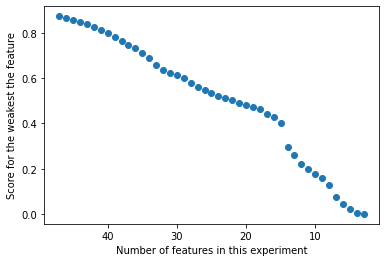

In [28]:
plot_1_data = []
for exp_no in results.keys():
        plot_1_data.append((exp_no,results[exp_no]["lowest_score"]))

plt.scatter(*zip(*plot_1_data))
plt.gca().invert_xaxis()
# plt.ylim(0,0.5)
plt.xlabel("Number of features in this experiment")
plt.ylabel("Score for the weakest the feature")
plt.show()

## Shutdown Cluster

In [220]:
# client = distributed.client._get_global_client()
# client

Client Scheduler: tcp://127.0.0.1:34217 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 96 Memory: 538.97 GB


In [221]:
# client.shutdown()


distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
ERROR:asyncio:_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
